In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [141]:
df = pd.read_csv("HousePrice.csv")
df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [142]:
#row x col
df.shape

(2919, 13)

In [143]:
#Understanding the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [144]:
#dropping the first column ID
df.drop(['Id'], axis=1, inplace=True)
df.head()

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [145]:
#calculating missing values
df.isna().sum()

,0
MSSubClass,0
MSZoning,4
LotArea,0
LotConfig,0
BldgType,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
Exterior1st,1
BsmtFinSF2,1


In [146]:
#Replacing all the missing values with NaN
ReplaceValues =  df.replace('',np.NaN)
ReplaceValues.tail()

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN
2918,60,RL,9627,Inside,1Fam,5,1993,1994,HdBoard,0.0,996.0,NaN


In [147]:
# Cleaning Data and Replacing Values of Sale Price Coloumn.
AVG_Sale =  df['SalePrice'].mean()
print(AVG_Sale)
df['SalePrice'] =  df['SalePrice'].fillna(AVG_Sale)
df.tail()

180921.19589041095


,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,180921.19589
2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,180921.19589
2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,180921.19589
2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,180921.19589
2918,60,RL,9627,Inside,1Fam,5,1993,1994,HdBoard,0.0,996.0,180921.19589


In [148]:
#Replaced The Missing Value in Exterior1st Column with the most Frequent Value
df['Exterior1st']=df['Exterior1st'].replace(np.NaN,'VinylSd')
df['MSZoning']=df['MSZoning'].replace(np.NaN,'RL')
# df.isna().sum()

In [149]:
#Calculating the mean of BOTH cols BSMtFinSF2 and TotalBsmtSF
Mean_BSMT = df['BsmtFinSF2'].mean()
df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(Mean_BSMT)
Mean_Total = df['TotalBsmtSF'].mean()
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(Mean_Total)
df.isna().sum()

,0
MSSubClass,0
MSZoning,0
LotArea,0
LotConfig,0
BldgType,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
Exterior1st,0
BsmtFinSF2,0


In [150]:
#Getting the correlation of Numerical Cols
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.corr()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
MSSubClass,1.000000,-0.201730,-0.065625,0.034409,0.043315,-0.072520,-0.219936,-0.059294
LotArea,-0.201730,1.000000,-0.035617,0.024128,0.021612,0.084055,0.254125,0.236105
OverallCond,-0.065625,-0.035617,1.000000,-0.368477,0.047654,0.041489,-0.173952,-0.055036
YearBuilt,0.034409,0.024128,-0.368477,1.000000,0.612235,-0.027591,0.408466,0.368664
YearRemodAdd,0.043315,0.021612,0.047654,0.612235,1.000000,-0.062125,0.297969,0.354302
BsmtFinSF2,-0.072520,0.084055,0.041489,-0.027591,-0.062125,1.000000,0.089410,-0.007672
TotalBsmtSF,-0.219936,0.254125,-0.173952,0.408466,0.297969,0.089410,1.000000,0.431912
SalePrice,-0.059294,0.236105,-0.055036,0.368664,0.354302,-0.007672,0.431912,1.000000


<Axes: >

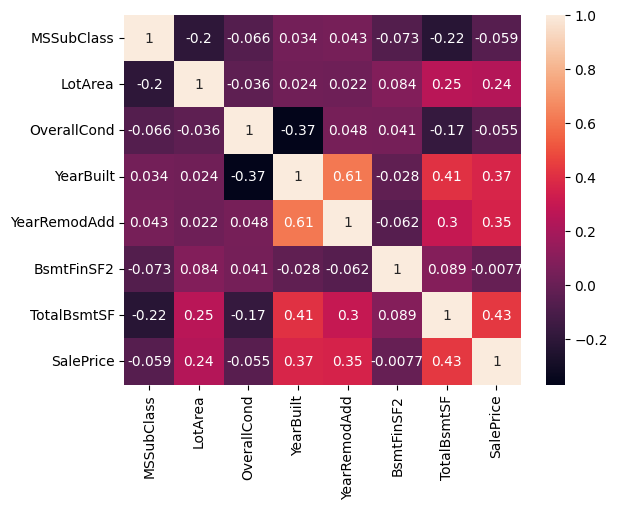

In [151]:
#Visualizing the numerical Values using heatmap
sns.heatmap(df_numeric.corr(), annot = True)

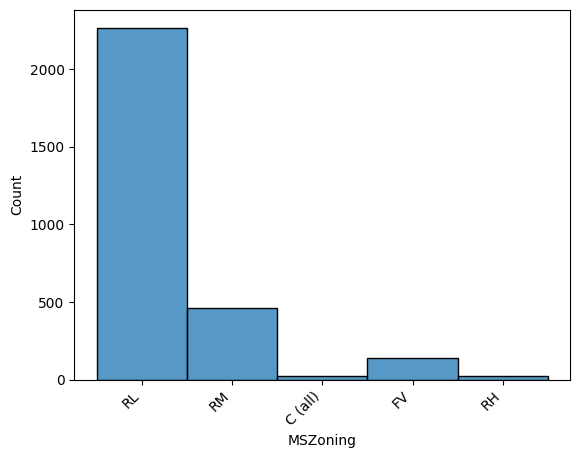

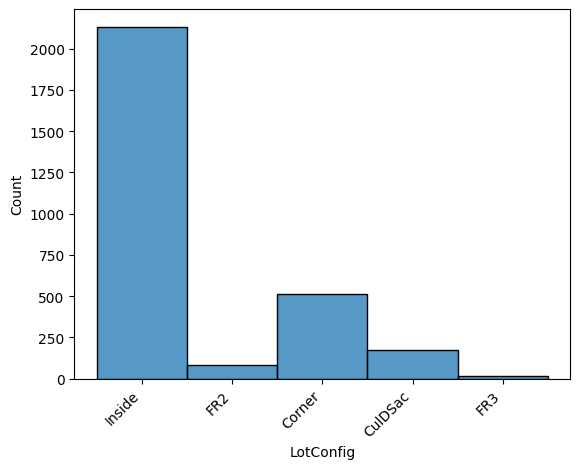

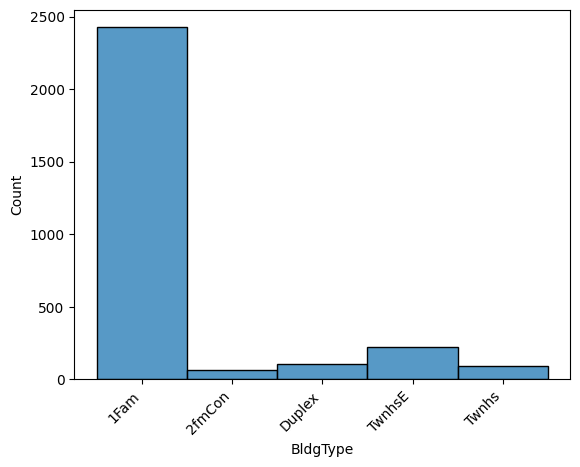

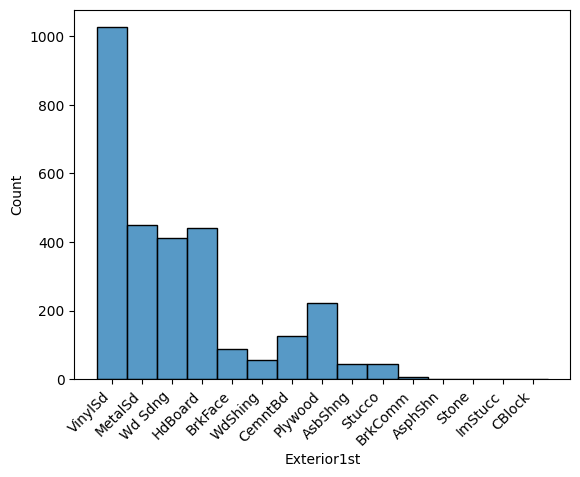

In [152]:
#Visualizing categorical values using histograms.
categorical_cols = df.select_dtypes(exclude=[np.number])
for col in categorical_cols:
  sns.histplot(x=col, data=df)
  plt.xticks(rotation=45, ha='right')
  plt.show()

In [153]:
#Converting Categorical Values to Numerical

object_type = df.select_dtypes(include='object').columns
new_dataset = df[object_type]
object_cols = new_dataset.columns

OH_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out(object_cols)

df_final = df.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)
print(df_final.columns)

Index(['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice', 'MSZoning_C (all)',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'LotConfig_FR3', 'LotConfig_Inside', 'BldgType_1Fam', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'Exterior1st_AsbShng', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd',
       'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [154]:
# Splitting Data to training set and test set
from sklearn.model_selection import train_test_split
X = df_final[['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice', 'MSZoning_C (all)',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'LotConfig_FR3', 'LotConfig_Inside', 'BldgType_1Fam', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'Exterior1st_AsbShng', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd',
       'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing']]
y = df_final['SalePrice']
X_train, X_test, y_train, y_test = train_test_split (X,y,train_size = 0.8,test_size=0.2,random_state = 0)

In [155]:
model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R-Squared on test data:", r2 * 100)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE) on test data:", mae)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) on test data:", mse)

rmse = mse**0.5
print("Root Mean Squared Error (RMSE) on test data:", rmse)


R-Squared on test data: 100.0
Mean Absolute Error (MAE) on test data: 3.555750518986215e-11
Mean Squared Error (MSE) on test data: 1.902560733837035e-21
Root Mean Squared Error (RMSE) on test data: 4.3618353176581935e-11
